In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

%matplotlib inline

pd.set_option('display.max_columns', 36)
print(pd.__version__)

import nltk
import string
from nltk import word_tokenize
from nltk.util import bigrams, trigrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

0.18.0


In [2]:
turbo_csv_filename = os.path.join("./", 'final.csv')
TURBO_DF = pd.read_csv(turbo_csv_filename)


,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count
0,--0HEXd4W6bJI8k7E0RxTA,ZvvTPVqChi-mQd1JV6VM5w,2013-07-13,1.0,0.0,5.0,1.0,"Friendly people, friendly bartenders. good atm...",JL,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,5.000000,4.375,16,2
1,-QTX2UW6PRXnuKRbqJ0soQ,ZvvTPVqChi-mQd1JV6VM5w,2010-09-08,0.0,0.0,5.0,1.0,"Awesome. Was greeted when we came in, the staf...",Clint,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.000000,4.375,16,2
2,4D4UzEOu-QG4-jkyfynhPQ,ZvvTPVqChi-mQd1JV6VM5w,2013-01-03,1.0,2.0,5.0,2.0,Nu towne is the place that my roomies and I ab...,Preston,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.044554,4.375,16,202
3,822zBCq_uB1-I3ncr_oAFg,ZvvTPVqChi-mQd1JV6VM5w,2014-11-11,1.0,0.0,5.0,0.0,This place is the deal great drinks atmosphere...,Beau,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,5.000000,4.375,16,3
4,8qe2c5uRlAkvNFvDriBm1Q,ZvvTPVqChi-mQd1JV6VM5w,2013-12-01,2.0,5.0,5.0,3.0,"The history, the people, the license plates......",Chris,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,2.597403,4.375,16,77


In [3]:
TURBO_DF

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count
0,--0HEXd4W6bJI8k7E0RxTA,ZvvTPVqChi-mQd1JV6VM5w,2013-07-13,1.0,0.0,5.0,1.0,"Friendly people, friendly bartenders. good atm...",JL,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,5.000000,4.375000,16,2
1,-QTX2UW6PRXnuKRbqJ0soQ,ZvvTPVqChi-mQd1JV6VM5w,2010-09-08,0.0,0.0,5.0,1.0,"Awesome. Was greeted when we came in, the staf...",Clint,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.000000,4.375000,16,2
2,4D4UzEOu-QG4-jkyfynhPQ,ZvvTPVqChi-mQd1JV6VM5w,2013-01-03,1.0,2.0,5.0,2.0,Nu towne is the place that my roomies and I ab...,Preston,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.044554,4.375000,16,202
3,822zBCq_uB1-I3ncr_oAFg,ZvvTPVqChi-mQd1JV6VM5w,2014-11-11,1.0,0.0,5.0,0.0,This place is the deal great drinks atmosphere...,Beau,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,5.000000,4.375000,16,3
4,8qe2c5uRlAkvNFvDriBm1Q,ZvvTPVqChi-mQd1JV6VM5w,2013-12-01,2.0,5.0,5.0,3.0,"The history, the people, the license plates......",Chris,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,2.597403,4.375000,16,77
5,C8ZTiwa7qWoPSMIivTeSfw,ZvvTPVqChi-mQd1JV6VM5w,2008-05-05,8.0,10.0,4.0,8.0,What a perfect location for Nu Towne Saloon. W...,Thomas,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,3.616000,4.375000,16,375
6,GubdNFoDAsiwE6bWIr97cQ,ZvvTPVqChi-mQd1JV6VM5w,2008-05-05,2.0,2.0,5.0,4.0,My review would be from 1973. Everyone was fri...,Michael,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,3.382353,4.375000,16,204
7,VM8ABgfaaNVIBorYFng-Rw,ZvvTPVqChi-mQd1JV6VM5w,2014-03-30,0.0,7.0,1.0,5.0,"LOTS of cock sucking, ass eating and cum swapp...",C,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,1.000000,4.375000,16,2
8,Wyr_WsWFqp9X3Y14tBSGJA,ZvvTPVqChi-mQd1JV6VM5w,2015-01-09,1.0,0.0,5.0,1.0,This is been one of the best bars in town for ...,Troy,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,3.911111,4.375000,16,45
9,ay9H1RpjbBkaiXGxfh7LaA,ZvvTPVqChi-mQd1JV6VM5w,2013-03-26,2.0,6.0,4.0,2.0,Any place that plays Sunshine Day by the Brady...,Kara,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.000000,4.375000,16,14


In [17]:
def randomSample(data, length):
    total_len = len(data)
    frac1 = length / total_len
    #print(frac1)
    sample = data.sample(frac = frac1, replace = True)
    return sample
sample = randomSample(TURBO_DF, 50000)

In [18]:
sample

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count
1395242,HugMVHou82NUdKqhpYsLsg,zfY68t7nVihCwiCsCgM6cw,2014-03-27,1.0,0.0,5.0,1.0,I spent two weeks in beautiful Phoenix at the ...,Ali,"['Food', 'Ethnic Food', 'Specialty Food', 'Med...",Olive Tree Market & Grill,"1930 W Pinnacle Peak Rd\nSte 101\nPhoenix, AZ ...",Phoenix,AZ,business,33.698891,-112.101241,False,none,1.0,5.000000,4.431373,102,1
749069,s4tkWsXxIGxv6-k6QoJBTA,MN0OLvP8i0SirMJ7AMuMzA,2015-03-13,1.0,0.0,4.0,3.0,Seemed to be the place had a different kitchen...,Joe,"['Pizza', 'Restaurants']",Pizza Rock,"201 N 3rd St\nDowntown\nLas Vegas, NV 89101",Las Vegas,NV,business,36.171830,-115.142007,False,full_bar,2.0,4.000000,4.272300,1065,1
484083,X01EFxZ1-nNAXh5W5puMww,VSf52mJkhZ7hRzFWT8WCMA,2013-11-24,0.0,0.0,3.0,0.0,It's Asian fast food. Nothing too fancy. Nothi...,Jared,['Restaurants'],Panda Express,"3765 S Gilbert Road\nGilbert, AZ 85296",Gilbert,AZ,business,33.281403,-111.789325,False,NaN,1.0,4.176471,2.111111,9,17
923674,mBApNPdqoirj5WkHEaIpOg,-GZsHVDlI6wvLsgD1Yaj0g,2011-01-13,1.0,0.0,5.0,3.0,"Wanna get away from the Starbucks blah, then t...",frank,"['Coffee & Tea', 'Food', 'Bars', 'Pubs', 'Sand...",The Beat Coffeehouse,"520 Fremont St\nSte 101\nDowntown\nLas Vegas, ...",Las Vegas,NV,business,36.169116,-115.139599,False,beer_and_wine,1.0,3.800000,4.040590,271,15
1337875,y0kjuHVdGQhLd-bqQ0gZnA,oPhx1YGHyLmtl6sfo3Vr8A,2015-03-26,0.0,0.0,4.0,1.0,This place is great. I originally tried it fr...,Lisa,"['Mexican', 'Restaurants']",Pedro's Mexican Restaurant,"4938 W Glendale Ave\nGlendale, AZ 85301",Glendale,AZ,business,33.538719,-112.166287,False,beer_and_wine,2.0,3.467532,4.122951,122,77
36448,BqVc6ZXEG49GfJeBHWc8Ug,jtzhY-P4H6WSYpv5rWhxtw,2011-11-16,0.0,0.0,4.0,0.0,Let me start by saying I love this place! The...,Teresa,"['Vietnamese', 'Restaurants']",Rice Paper,"2221 N 7th St\nPhoenix, AZ 85006",Phoenix,AZ,business,33.471985,-112.064757,False,full_bar,2.0,4.000000,3.620865,393,3
890002,w-bm02pkibWFdEi4AXnhDA,6eWioCKMsJU5goe_jbipyQ,2013-04-01,0.0,0.0,2.0,1.0,80s Night on Fridays... the idea was awesome.....,Cath,"['Bars', 'Nightlife', 'Lounges']",Gold Lounge,ARIA Resort & Casino\n3730 Las Vegas Blvd\nThe...,Las Vegas,NV,business,36.106708,-115.177529,NaN,full_bar,2.0,3.481481,2.755725,131,27
1426336,9BdpkqqoHm2q6AYaoIvmsQ,zF4umxDlxOOYJDQbR3Tnxw,2015-06-01,1.0,0.0,5.0,5.0,Love this pool! It has the feel of a pool club...,Chelsea,"['Active Life', 'Swimming Pools']",Moorea Beach Club,Mandalay Bay Resort & Casino\n3950 S Las Vegas...,Las Vegas,NV,business,36.091864,-115.175161,NaN,full_bar,3.0,5.000000,4.239130,92,9
993412,fb1Tl0QC_rKXMqLIVA82Kw,aYAlzKHwXQn6JNLweRnZjQ,2012-06-11,0.0,0.0,5.0,1.0,From Az....it's a must every trip 2 Las Vegas....,Michelle,"['Breakfast & Brunch', 'American (Traditional)...",Nacho Daddy Henderson,"9925 S Eastern Ave\nAnthem\nLas Vegas, NV 89183",Las Vegas,NV,business,36.009253,-115.116984,False,full_bar,2.0,4.500000,3.357834,517,2
1410456,myvbQ2ybsA5kG4hmaYlAlA,FiZ4mt-3YolcQRQAjx6x4Q,2015-05-17,0.0,0.0,3.0,2.0,Be prepared to wait......\n THIS PLACE LIKE SO...,Karen,"['Doctors', 'Orthopedists', 'Health & Medical']",Desert Orthopedic Center,2930 W Horizon Ridge Pky\nSte 100\nAnthem\nHen...,Henderson,NV,business,35.999382,-115.115389,NaN,NaN,NaN,3.833333,2.444444,9,6


In [19]:
import json
from collections import OrderedDict

def textProcess(s):
    s = s.lower()
    #print(s)
    s = s.translate(str.maketrans(dict.fromkeys(string.punctuation, None)))
    # may consider removing arabic-hindu digits
    token_list = nltk.word_tokenize(s)
    #print(token_list)
    #return token_list
    exclude_stopwords = lambda token : token not in NLTK_STOPWORDS
    return list(filter(exclude_stopwords, token_list))

def count_number_of_positive_words(document):
    return len(list((filter(lambda tok : tok in POSITIVE_WORDS, document))))

def count_number_of_negative_words(document):
    return len(list((filter(lambda tok : tok in NEGATIVE_WORDS, document))))


POSITIVE_WORDS = set([line.strip() for line in open('positive-words.txt', 'r')])
NEGATIVE_WORDS = set([line.strip() for line in open('negative-words.txt', 'r')])
NLTK_STOPWORDS = set(stopwords.words('english'))
MORE_STOPWORDS = set([line.strip() for line in open('more_stopwords.txt', 'r')])
#print(sample['text'])

sample['text'] = sample['text'].apply(textProcess)
sample['positive_words_count'] = sample.text.apply(count_number_of_positive_words)
sample['negative_words_count'] = sample.text.apply(count_number_of_negative_words)
#final_DF['neutral_words_count'] = final_DF.review_length - (df_with_refeature_engineered.positive_words_count + df_with_refeature_engineered.negative_words_count)
sample['all_sentiment_words_count'] = sample['positive_words_count'] + sample['negative_words_count']

sample['positive'] = (sample['positive_words_count'] * 1.0)/ (sample['all_sentiment_words_count'] * 1.0)
sample['negative'] = (sample['negative_words_count'] * 1.0)/ (sample['all_sentiment_words_count'] * 1.0)
sample['ratio'] = (sample['positive_words_count'] * 1.0)/ (sample['negative_words_count'] * 1.0)
sample['positive'] = sample['positive'] = sample['positive'].fillna(2)
sample = sample.drop(sample[sample.positive ==2].index)
sample = sample.replace('inf', 999)
sample

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count,positive_words_count,negative_words_count,all_sentiment_words_count,positive,negative,ratio
1395242,HugMVHou82NUdKqhpYsLsg,zfY68t7nVihCwiCsCgM6cw,2014-03-27,1.0,0.0,5.0,1.0,"[spent, two, weeks, beautiful, phoenix, end, f...",Ali,"['Food', 'Ethnic Food', 'Specialty Food', 'Med...",Olive Tree Market & Grill,"1930 W Pinnacle Peak Rd\nSte 101\nPhoenix, AZ ...",Phoenix,AZ,business,33.698891,-112.101241,False,none,1.0,5.000000,4.431373,102,1,24,3,27,0.888889,0.111111,8.000000
749069,s4tkWsXxIGxv6-k6QoJBTA,MN0OLvP8i0SirMJ7AMuMzA,2015-03-13,1.0,0.0,4.0,3.0,"[seemed, place, different, kitchen, popular, s...",Joe,"['Pizza', 'Restaurants']",Pizza Rock,"201 N 3rd St\nDowntown\nLas Vegas, NV 89101",Las Vegas,NV,business,36.171830,-115.142007,False,full_bar,2.0,4.000000,4.272300,1065,1,7,0,7,1.000000,0.000000,999.000000
484083,X01EFxZ1-nNAXh5W5puMww,VSf52mJkhZ7hRzFWT8WCMA,2013-11-24,0.0,0.0,3.0,0.0,"[asian, fast, food, nothing, fancy, nothing, e...",Jared,['Restaurants'],Panda Express,"3765 S Gilbert Road\nGilbert, AZ 85296",Gilbert,AZ,business,33.281403,-111.789325,False,NaN,1.0,4.176471,2.111111,9,17,5,1,6,0.833333,0.166667,5.000000
923674,mBApNPdqoirj5WkHEaIpOg,-GZsHVDlI6wvLsgD1Yaj0g,2011-01-13,1.0,0.0,5.0,3.0,"[wan, na, get, away, starbucks, blah, try, pla...",frank,"['Coffee & Tea', 'Food', 'Bars', 'Pubs', 'Sand...",The Beat Coffeehouse,"520 Fremont St\nSte 101\nDowntown\nLas Vegas, ...",Las Vegas,NV,business,36.169116,-115.139599,False,beer_and_wine,1.0,3.800000,4.040590,271,15,6,2,8,0.750000,0.250000,3.000000
1337875,y0kjuHVdGQhLd-bqQ0gZnA,oPhx1YGHyLmtl6sfo3Vr8A,2015-03-26,0.0,0.0,4.0,1.0,"[place, great, originally, tried, groupon, pur...",Lisa,"['Mexican', 'Restaurants']",Pedro's Mexican Restaurant,"4938 W Glendale Ave\nGlendale, AZ 85301",Glendale,AZ,business,33.538719,-112.166287,False,beer_and_wine,2.0,3.467532,4.122951,122,77,7,5,12,0.583333,0.416667,1.400000
36448,BqVc6ZXEG49GfJeBHWc8Ug,jtzhY-P4H6WSYpv5rWhxtw,2011-11-16,0.0,0.0,4.0,0.0,"[let, start, saying, love, place, pho, amazing...",Teresa,"['Vietnamese', 'Restaurants']",Rice Paper,"2221 N 7th St\nPhoenix, AZ 85006",Phoenix,AZ,business,33.471985,-112.064757,False,full_bar,2.0,4.000000,3.620865,393,3,11,3,14,0.785714,0.214286,3.666667
890002,w-bm02pkibWFdEi4AXnhDA,6eWioCKMsJU5goe_jbipyQ,2013-04-01,0.0,0.0,2.0,1.0,"[80s, night, fridays, idea, awesome, however, ...",Cath,"['Bars', 'Nightlife', 'Lounges']",Gold Lounge,ARIA Resort & Casino\n3730 Las Vegas Blvd\nThe...,Las Vegas,NV,business,36.106708,-115.177529,NaN,full_bar,2.0,3.481481,2.755725,131,27,8,6,14,0.571429,0.428571,1.333333
1426336,9BdpkqqoHm2q6AYaoIvmsQ,zF4umxDlxOOYJDQbR3Tnxw,2015-06-01,1.0,0.0,5.0,5.0,"[love, pool, feel, pool, club, without, feelin...",Chelsea,"['Active Life', 'Swimming Pools']",Moorea Beach Club,Mandalay Bay Resort & Casino\n3950 S Las Vegas...,Las Vegas,NV,business,36.091864,-115.175161,NaN,full_bar,3.0,5.000000,4.239130,92,9,14,3,17,0.823529,0.176471,4.666667
993412,fb1Tl0QC_rKXMqLIVA82Kw,aYAlzKHwXQn6JNLweRnZjQ,2012-06-11,0.0,0.0,5.0,1.0,"[azits, must, every, trip, 2, las, vegas, chef...",Michelle,"['Breakfast & Brunch', 'American (Traditional)...",Nacho Daddy Henderson,"9925 S Eastern Ave\nAnthem\nLas Vegas, NV 89183",Las Vegas,NV,business,36.009253,-115.116984,False,full_bar,2.0,4.500000,3.357834,517,2,3,0,3,1.000000,0.000000,999.000000
1410456,myvbQ2ybsA5kG4hmaYlAlA,FiZ4mt-3YolcQRQAjx6x4Q,2015-05-17,0.0,0.0,3.0,2.0,"[prepared, wait, place, like, many, doctors, o...",Karen,"['Doctors', 'Orthopedists', 'Health & Medical']",Desert Orthopedic Center,2930 W Horizon Ridge Pky\nSte 100\nAnthem\nHen...,Henderson,NV,business,35.999382,-115.115389,NaN,NaN,NaN,3.833333,2.444444,9,6,7,0,7,1.00

In [21]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import *
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
TEST_SIZE = 0.40


#train_review, test_review, train_stars, test_stars = train_test_split(user_all[['BP_average_stars','positive','average_diff'
#                        'negative','ratio','positive_words_count','negative_words_count','all_sentiment_words_count']],
#                         user_all['review_stars'],test_size=TEST_SIZE,random_state=42)
train_review, test_review, train_stars, test_stars = train_test_split(sample[['positive','negative','ratio']],
                         sample['review_stars'],test_size=TEST_SIZE,random_state=42)


In [22]:
def make_confusion_matrix_relative(confusion_matrix):
    star_category_classes = [1, 2, 3, 4, 5]
    N = list(map(lambda clazz : sum(test_stars == clazz), star_category_classes))
    relative_confusion_matrix = np.empty((len(star_category_classes), len(star_category_classes)))
    
    for j in range(0, len(star_category_classes)):
        if N[j] > 0:
            relative_frequency = confusion_matrix[j, :] / float(N[j])
            relative_confusion_matrix[j, :] = relative_frequency
            
    return relative_confusion_matrix

# http://www.wenda.io/questions/4330313/heatmap-with-text-in-each-cell-with-matplotlibs-pyplot.html
# http://stackoverflow.com/questions/20520246/create-heatmap-using-pandas-timeseries
# http://sebastianraschka.com/Articles/heatmaps_in_r.html
# http://code.activestate.com/recipes/578175-hierarchical-clustering-heatmap-python/
def plot_confusion_matrix(confusion_matrix=[[]], title='CM', savefilename=''):
    rcm = make_confusion_matrix_relative(confusion_matrix)
    #plt.imshow(rcm, vmin=0, vmax=1, interpolation='nearest')
    c = plt.pcolor(rcm, edgecolors='k', linewidths=4, cmap='jet', vmin=0.0, vmax=1.0)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.xticks(0.5 + np.arange(5), np.arange(1,6))
    plt.yticks(0.5 + np.arange(5), np.arange(1,6))

    def show_values(pc, fmt="%.2f", **kw):
        pc.update_scalarmappable()
        ax = pc.get_axes()
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if sum(color[:2] > 0.3) >= 2:
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)
    
    show_values(c)

    if savefilename:
        plt.savefig(savefilename, bbox_inches='tight')
    
    return plt.show()


def print_classifier_performance_metrics(name, predictions):
    target_names = ['1 star', '2 star', '3 star', '4 star', '5 star']
    
    print("MODEL: %s" % name)
    print()

    print('Precision: ' + str(metrics.precision_score(test_stars, predictions))) 
    print('Recall: ' + str(metrics.recall_score(test_stars, predictions))) 
    print('F1: ' + str(metrics.f1_score(test_stars, predictions)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_stars, predictions)))

    print()
    print('Classification Report:') 
    print(classification_report(test_stars, predictions, target_names=target_names)) 
    
    print()
    print('Precision variance: %f' % np.var(precision_score(test_stars, predictions, average=None), ddof=len(target_names)-1)) 
    
    print()
    print('Recall variance: %f' % np.var(recall_score(test_stars, predictions, average=None), ddof=len(target_names)-1)) 

C:\Software\Anaconda3\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


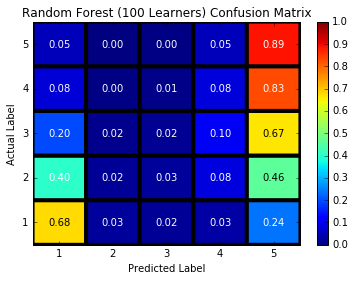

MODEL: Random Forest (100 Learners)

Precision: 0.379210614285
Recall: 0.465472757626
F1: 0.360887758174
Accuracy: 0.465472757626

Classification Report:
             precision    recall  f1-score   support

     1 star       0.44      0.68      0.53      2293
     2 star       0.21      0.02      0.04      1673
     3 star       0.20      0.02      0.03      2466
     4 star       0.32      0.08      0.13      5288
     5 star       0.49      0.89      0.63      8047

avg / total       0.38      0.47      0.36     19767


Precision variance: 0.070047

Recall variance: 0.688459


C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sam

In [23]:
forest100 = RandomForestClassifier(n_estimators = 100, random_state=42)
forest100.fit(train_review, train_stars)
forest100_pred = forest100.predict(test_review)
random_forest_confusion_matrix = confusion_matrix(test_stars, forest100_pred)
plot_confusion_matrix(random_forest_confusion_matrix, 'Random Forest (100 Learners) Confusion Matrix',savefilename='RandomForestCM.png')
print_classifier_performance_metrics('Random Forest (100 Learners)', forest100_pred)